# Imports

In [1]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ---
import sys; sys.path.append('../')
from commons.dataset import *
from modules.face_extractor import FaceExtractor

# Constants

In [2]:

DATASE_INPUT = DATASETS_PATHS.processed
DATASET_OUTPUT = DATASETS_PATHS.faces

# Load model

In [3]:
detector = FaceExtractor()

I0000 00:00:1733706559.978440  285231 gl_context.cc:357] GL version: 2.1 (2.1 INTEL-23.0.22), renderer: Intel(R) Iris(TM) Plus Graphics 645
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1733706559.985554  285460 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


# Load dataset

In [4]:
dataset = pd.read_csv(DATASE_INPUT.info)

### Testing the model

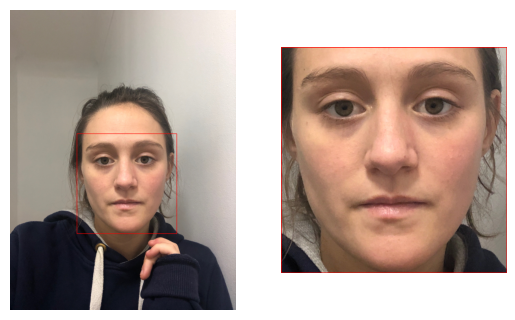

In [5]:
img = cv2.cvtColor(cv2.imread(f'../{dataset.path.sample(1).iloc[0]}'), cv2.COLOR_BGR2RGB)
detections = detector(img)

for det in detector(img):
	x,y,w,h = det

	cv2.rectangle(img, (x, y), (x+w, y+h), (255,0,0), 3)
	plt.figure()
	plt.subplot(1,2,1)
	plt.imshow(img)
	plt.axis('off')
	plt.subplot(1,2,2)
	plt.imshow(img[y:y+h,x:x+w])
	plt.axis('off')

In [ ]:
# create paths for output
if not os.path.exists(DATASET_OUTPUT.data): os.makedirs(DATASET_OUTPUT.data)
if not os.path.exists(os.path.join(DATASET_OUTPUT.data, 'rejected')): os.makedirs(os.path.join(DATASET_OUTPUT.data, 'rejected'))

# create dataset
faces_dataset = pd.DataFrame(columns=dataset.columns)

count = 0
def process(entry):
	global count
	img = cv2.imread(f'../{entry.path}')
	det = detector(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

	if len(det) <= 0: # no face detected
		print(entry.path)
		cv2.imwrite(os.path.join(DATASET_OUTPUT.data, 'rejected',f'{count:3}.png'), img)
		count+=1
		return

	# extract values
	x,y,w,h = det[0]
	
	# add entry to dataset & save image to directory
	faces_dataset.loc[len(faces_dataset)] = [ entry.setid,os.path.join(DATASET_OUTPUT.data, f'{count:3}.png')]
	cv2.imwrite(os.path.join(DATASET_OUTPUT.data, f'{count:3}.png'), img[y:y+h,x:x+w])

	count+=1

dataset.apply(process, axis=1) # apply function
faces_dataset.to_csv(DATASET_OUTPUT.info, index=False) # save dataset to csv

cosa1
cosa2
cosa1
cosa2
cosa1
cosa2
cosa1
cosa2
cosa1
cosa2
cosa1
cosa2
cosa1
cosa2
cosa1
cosa2
cosa1
cosa2
cosa1
cosa2
cosa1
cosa2
cosa1
cosa2
cosa1
cosa2
cosa1
cosa2
cosa1
cosa2
cosa1
cosa2
cosa1
cosa2
cosa1
cosa2
cosa1
cosa2
cosa1
cosa2
cosa1
cosa2
cosa1
cosa2
cosa1
cosa2
data/dataset/Selfies ID Images dataset/Caucasians/0001ca9b9a--61ab21f4277a1c323b746383_age_23_name_Andrea_Ran/ID_2.jpg
cosa1
cosa2
cosa1
cosa2
cosa1
cosa2
cosa1
cosa2
cosa1
cosa2
cosa1
cosa2
cosa1
cosa2
cosa1
cosa2


Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


cosa1
cosa2
cosa1


Invalid SOS parameters for sequential JPEG


cosa2
cosa1
cosa2


Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


cosa1
cosa2
cosa1
cosa2
cosa1
cosa2


Invalid SOS parameters for sequential JPEG


cosa1
cosa2
data/dataset/Selfies ID Images dataset/Caucasians/0001ca9b9a--61ab3a5fd6d182382f20a168_age_61_name_Paolo/ID_2.jpg
cosa1
cosa2
cosa1
cosa2


Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


cosa1
cosa2
cosa1


Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


cosa2
cosa1
cosa2
cosa1


Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


cosa2
cosa1
cosa2


Invalid SOS parameters for sequential JPEG


cosa1
cosa2
cosa1
cosa2
cosa1
cosa2
cosa1
cosa2
cosa1
cosa2
cosa1
cosa2
cosa1
cosa2
cosa1
cosa2
cosa1
cosa2
cosa1
cosa2
cosa1
cosa2
cosa1
cosa2
cosa1
cosa2
cosa1


KeyboardInterrupt: 